In [1]:
# 작업 경로 설정
%cd /home/yoo/works/CGD

from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
import re
import os
import urllib.request
import csv
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# chromedriver
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument("disable-gpu")
user_agent= "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Whale/3.19.166.16 Safari/537.36"
options.add_argument('user-agent=' + user_agent)
driver = webdriver.Chrome(ChromeDriverManager().install())

# 폴더가 없으면 새로 생성하는 함수
def mkfold(folder_name):
    if not os.path.isdir(folder_name): 
        os.makedirs(folder_name)

/home/yoo/works/CGD


[WDM] - Downloading: 100%|██████████| 6.98M/6.98M [00:00<00:00, 85.4MB/s]
/tmp/ipykernel_5420/3526479678.py:20: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [79]:
url = 'https://search.shopping.naver.com/search/category/100002454?catId=50001081&origQuery&pagingIndex=1&pagingSize=40&productSet=&query&sort=review_rel&timestamp=&viewType=list#'

# 웹페이지 로드
driver.get(url=url)

# 스크롤 내리기 이동 전 위치 저장
scroll_location = driver.execute_script("return document.body.scrollHeight")

while True:
	# 현재 스크롤의 가장 아래로 내림
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
       
    # 전체 스크롤이 늘어날 때까지 대기
    time.sleep(2)
    
    # 늘어난 스크롤 높이 저장
    scroll_height = driver.execute_script("return document.body.scrollHeight")

    # 늘어난 스크롤 위치와 이동 전 위치 같으면(더 이상 스크롤이 늘어나지 않으면) 반복 종료
    if scroll_location == scroll_height:
    	break
	    
    # 같지 않으면 스크롤 위치 값을 수정하여 같아질 때까지 반복
    else:
    	# 스크롤 위치값을 수정
    	scroll_location = scroll_height

In [84]:
# csv 파일 경로
csv_path = 'results/capture/test.csv'

# csv 파일 읽기
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path, index_col=0)
else:
    df = pd.DataFrame(columns=['alt', 'src', 'height', 'weight', 'url'])

# 페이지에 존재하는 이미지의 메타 정보 수집
elems = driver.find_elements(By.TAG_NAME, 'img')

for elem in elems:
    new_data = {}
    alt = elem.get_attribute("alt")
    src = elem.get_attribute("src")
    src = src.replace('?type=f140', '')

    height = int(elem.get_attribute("height"))
    weight = int(elem.get_attribute("width"))

    # 이미지 가로 또는 세로 길이가 100 픽셀 이상인 경우만 수집
    if height >= 100 or weight >= 100:
        new_data['alt'] = alt
        new_data['src'] = src
        new_data['height'] = height
        new_data['weight'] = weight

        # 기존 데이터 내에 이미 존재하는 이미지인지 확인
        if not any((df[['alt', 'src', 'height', 'weight']] == new_data).all(axis=1)):
            new_data['url'] = url
            # 데이터 가장 마지막 내용에 현재 이미지 메타 정보 추가
            df = df.append(new_data, ignore_index=True)

df.to_csv(csv_path, index=True)

In [85]:
driver.close()

### Capture Part

1. 셀레니움 웹 드라이버를 실행
2. tkinter 화면에 입력한 URL로 웹 드라이버를 이동하여, 화면에 존재하는 이미지의 메타 정보를 수집
3. 이미지의 가로 또는 세로 길이가 100 픽셀 이상인 경우 CSV_PATH.CSV 파일로 저장

In [3]:
from webdriver_manager.chrome import ChromeDriverManager
ChromeDriverManager().install()

[WDM] - Downloading: 100%|██████████| 6.98M/6.98M [00:00<00:00, 84.6MB/s]


'/home/yoo/.wdm/drivers/chromedriver/linux64/113.0.5672.63/chromedriver'

In [31]:
# 작업 경로 설정
%cd /home/yoo/works/CGD

from tkinter import *
from selenium import webdriver
from selenium.webdriver.common.by import By
import os
import urllib.request
import pandas as pd
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# tkinter 창 생성
root = Tk()
root.title("Web Scraper")

# 웹 드라이버 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument("--headless=new")
options.add_argument("--window-size=1920x1080")
options.add_argument("disable-gpu")

# 웹 드라이버 user agent 설정
user_agent= "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Whale/3.19.166.16 Safari/537.36"
options.add_argument('user-agent=' + user_agent)

# 웹 드라이버 실행
driver = webdriver.Chrome(options=options)
driver.get("https://google.com")

# csv 파일 경로
CSV_PATH = 'results/capture/test.csv'

# 검색 버튼 클릭 시 실행될 함수
def search():
    # 입력 상자에서 url 가져오기
    url = url_entry.get()

    # 스크롤 내리기 이동 전 위치 저장
    scroll_location = driver.execute_script("return document.body.scrollHeight")

    while True:
        # 현재 스크롤의 가장 아래로 내림
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        
        # 전체 스크롤이 늘어날 때까지 대기
        time.sleep(1)
        
        # 늘어난 스크롤 높이 저장
        scroll_height = driver.execute_script("return document.body.scrollHeight")

        # 늘어난 스크롤 위치와 이동 전 위치 같으면(더 이상 스크롤이 늘어나지 않으면) 반복 종료
        if scroll_location == scroll_height:
            break
            
        # 같지 않으면 스크롤 위치 값을 수정하여 같아질 때까지 반복
        else:
            # 스크롤 위치값을 수정
            scroll_location = scroll_height

    # selenium으로 url 이동
    driver.get(url)

# 캡쳐 버튼 클릭 시 실행될 함수
def capture():

    data_viewer.delete("1.0", "end")

    # csv 파일 읽기
    if os.path.exists(CSV_PATH):
        df = pd.read_csv(CSV_PATH, index_col=0)
        data_viewer.insert("end", f"{CSV_PATH} Load Complete.\n")
    else:
        df = pd.DataFrame(columns=['alt', 'src', 'height', 'weight', 'scrape_url', 'write_time'])
        data_viewer.insert("end", "New DataFrame is Created.\n")
        
    # 셀레니움으로 이미지 검색
    images = driver.find_elements(By.TAG_NAME, 'img')

    # 이미지 메타 정보 수집
    for image in images:
        data = {}
        alt = image.get_attribute("alt")
        src = image.get_attribute("src")
        if isinstance(src, str):
            src = src.replace('?type=f140', '')
            src = src.replace('<br>', '')
        height = int(image.get_attribute("height"))
        weight = int(image.get_attribute("width"))
        
        # 가로 또는 세로 길이가 100 픽셀 이상인 경우만 출력
        if height >= 100 or weight >= 100:
            data['alt'] = alt
            data['src'] = src
            data['height'] = height
            data['weight'] = weight
            # 기존 데이터 내에 이미 존재하는 이미지인지 확인
            if not any((df[['alt', 'src', 'height', 'weight']] == data).all(axis=1)):
                data['scrape_url'] = url_entry.get()
                data['write_time'] = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))
                # 데이터 가장 마지막에 현재 데이터 정보 추가
                # print(f"alt: {alt}, src: {src}, height: {height}, weight: {weight}")
                data_viewer.insert("end", f"{src}\n")
                df = df.append(data, ignore_index=True)
    
    # 데이터를 기존 파일에 덮어쓰기
    df.to_csv(CSV_PATH, index=True)
            
def clear():
   url_entry.delete(0, END)

def closing():
    driver.close()
    root.destroy()
    # root.quit()

# tkinter 위젯 생성
url_label = Label(root, text="URL:", width=10)
url_entry = Entry(root, width=50)
url_entry.insert(0, "https://google.com")
search_button = Button(root, text="검색", command=search, width=10)
clear_button = Button(root, text="초기화", command=clear, width=10)
capture_button = Button(root, text="정보 수집", command=capture, width=10)
quit_button = Button(root, text="종료", command=closing, width=10)
data_viewer = Text(root, width=90, height=10)

# tkinter 위젯 배치
url_label.grid(row=0, column=0, rowspan=2)
url_entry.grid(row=0, column=1, rowspan=2)
search_button.grid(row=0, column=2)
clear_button.grid(row=0, column=3)
capture_button.grid(row=1, column=2)
quit_button.grid(row=1, column=3)
data_viewer.grid(row=2, column=0, columnspan=4)

# tkinter 실행
root.mainloop()

/home/yoo/works/CGD


## Retrieval Part
1. 입력한 이미지를 학습된 모델로 통과시켜 feature map을 생성
2. 기존에 생성된 데이터베이스와 입력된 이미지의 feature map을 비교
3. 유클리디언 거리로 계산된 가장 가까운 이미지를 검색하여 보여줌

In [66]:
# 작업 폴더 설정
%cd /home/yoo/works/CGD

import os 
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

from model import Model

def retrieval(img_path):
    # 저장된 데이터베이스 경로
    data_base_name = 'results/01 recall scratch/custom_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_data_base.pth'
    # data_base_name = 'results/01 recall scratch/danawa_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_data_base.pth'

    # 입력 이미지에 적용할 모델 경로
    pretrained_model_path = 'results/01 recall scratch/danawa_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_model.pth'

    # 입력 이미지 경로
    # img_path = '/home/yoo/works/CGD/results/capture/test.jpg'

    # 출력할 검색 이미지(입력 이미지와 유사한 이미지) 갯수
    retrieval_num = 10

    backbone_type = 'resnet50'
    gd_config = 'SG'
    feature_dim = 1536

    # 저장된 데이터베이스 불러오기
    data_base = torch.load('{}'.format(data_base_name))

    # 입력 이미지 처리
    normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), normalize])

    query_image = Image.open(img_path).convert('RGB')
    input = transform(query_image)
    input = input.unsqueeze(0)

    # 입력 이미지에 모델 적용
    model = Model(backbone_type, gd_config, feature_dim, num_classes=162).cuda()
    model.load_state_dict(torch.load(pretrained_model_path), strict=False)
    model.eval()
    input = input.cuda()
    query_feature, classes = model(input)

    dist_matrix = torch.cdist(query_feature.unsqueeze(0).unsqueeze(0), data_base['test_features'].unsqueeze(0)).squeeze()
    idx = dist_matrix.topk(k=retrieval_num, dim=-1, largest=False)[1]

    # 이미지 출력 관련 코드
    fig, axs = plt.subplots(nrows=1, ncols=retrieval_num+1, figsize=(16, 2))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axs[0].imshow(query_image.resize((224, 224), resample=Image.BILINEAR))
    axs[0].set_title(f'Input Image')
    axs[0].text(112, 230, 'Class', verticalalignment='top' , horizontalalignment='center')
    axs[0].text(112, 260, 'Distance', verticalalignment='top' , horizontalalignment='center')
    axs[0].axis('off')

    # print("number \t image_path \t\t\t\t distance")

    for num, index in enumerate(idx):
        retrieval_image = Image.open(data_base['test_images'][index.item()]).convert('RGB') \
            .resize((224, 224), resample=Image.BILINEAR)
        draw = ImageDraw.Draw(retrieval_image)
        # retrieval_label = data_base['test_labels'][index.item()]
        # retrieval_status = (retrieval_label == query_label).item()
        retrieval_dist = dist_matrix[index.item()].item()
        # if retrieval_status:
        #     draw.rectangle((0, 0, 223, 223), outline='green', width=12)
        # else:
        #     draw.rectangle((0, 0, 223, 223), outline='red', width=12)
        # retrieval_image.save('{}/retrieval_img_{}_{}.jpg'.format(result_path, num + 1, '%.4f' % retrieval_dist))
        
        # 이미지 출력 관련 코드
        axs[num + 1].imshow(retrieval_image)
        axs[num + 1].set_title(f"{os.path.basename(data_base['test_images'][index.item()])}")
        axs[num + 1].text(112, 230, f"{os.path.basename(data_base['test_images'][index.item()]).split('_')[0]}", verticalalignment='top', horizontalalignment='center')
        axs[num + 1].text(112, 260, '%.4f' % retrieval_dist, verticalalignment='top', horizontalalignment='center')
        axs[num + 1].axis('off')

        # print("{} \t {} \t {}".format(num + 1, data_base['test_images'][index.item()], '%.4f' % retrieval_dist))

    # 그래프를 출력합니다.
    plt.suptitle('Retrieval Results')
    plt.tight_layout()
    # plt.savefig('test.png')
    plt.show()

/home/yoo/works/CGD


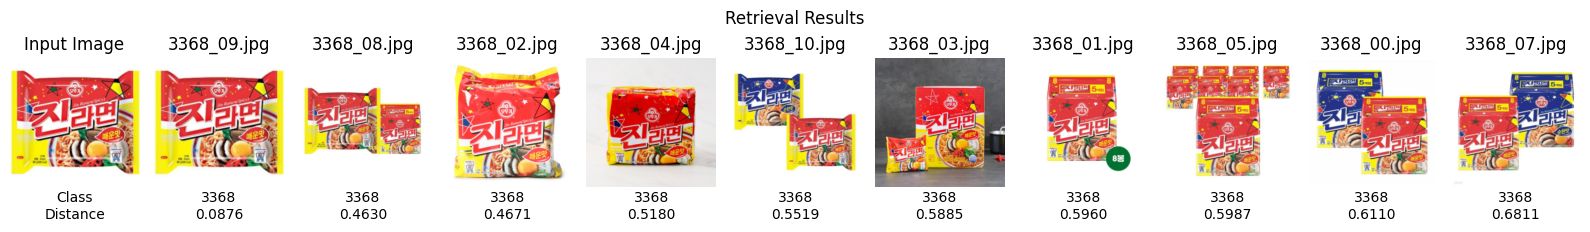

In [73]:
retrieval('/home/yoo/works/CGD/data/test_images/ramen.jpg')

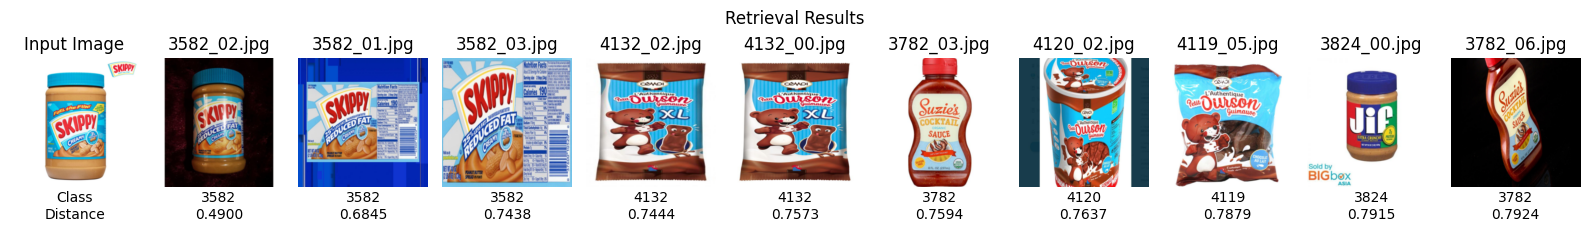

In [75]:
retrieval('/home/yoo/works/CGD/data/test_images/peanut_butter.jpg')

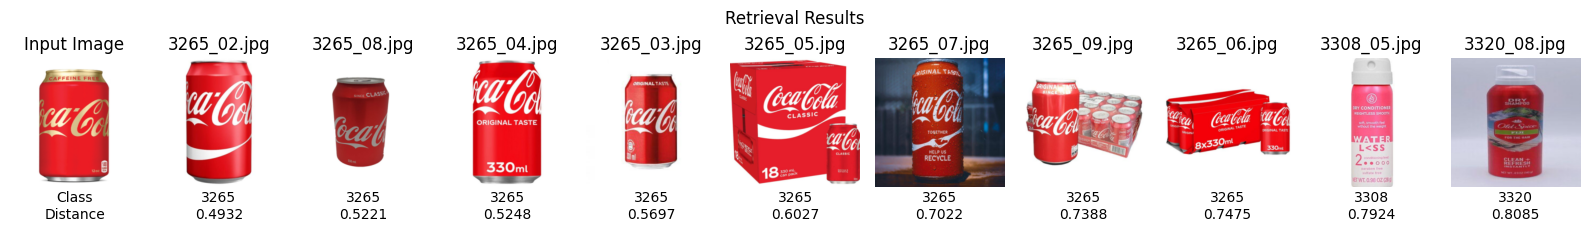

In [78]:
retrieval('/home/yoo/works/CGD/data/test_images/coca_cola.png')

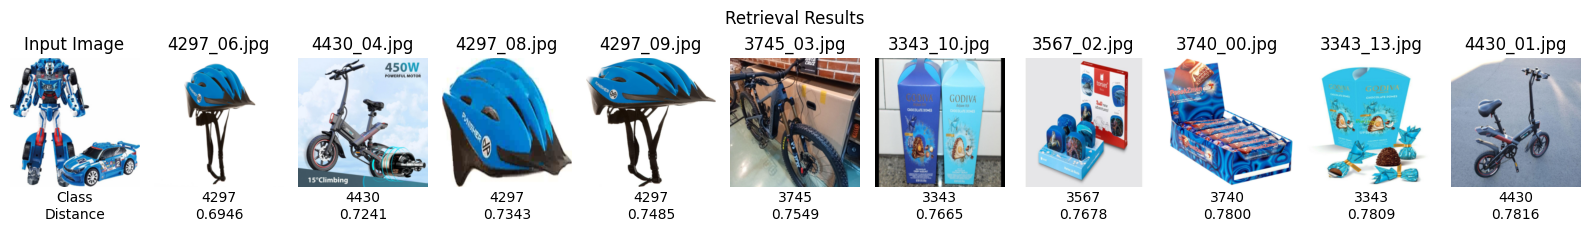

In [74]:
retrieval('/home/yoo/works/CGD/data/test_images/robot.jpg')

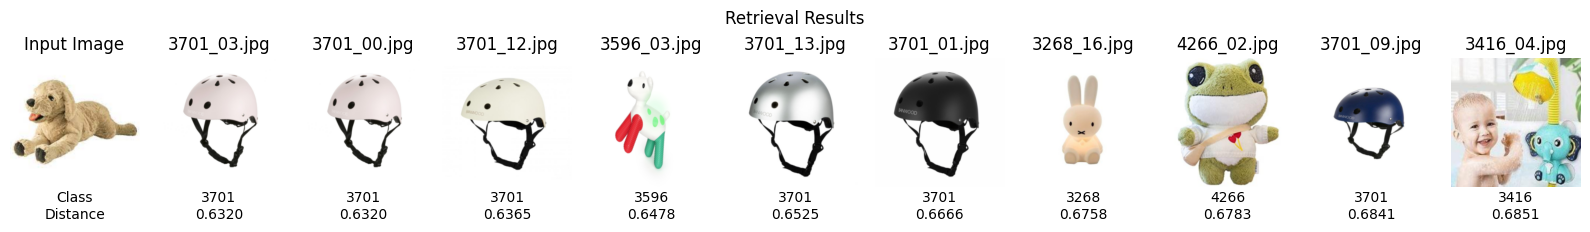

In [79]:
retrieval('/home/yoo/works/CGD/data/test_images/dog.jpeg')

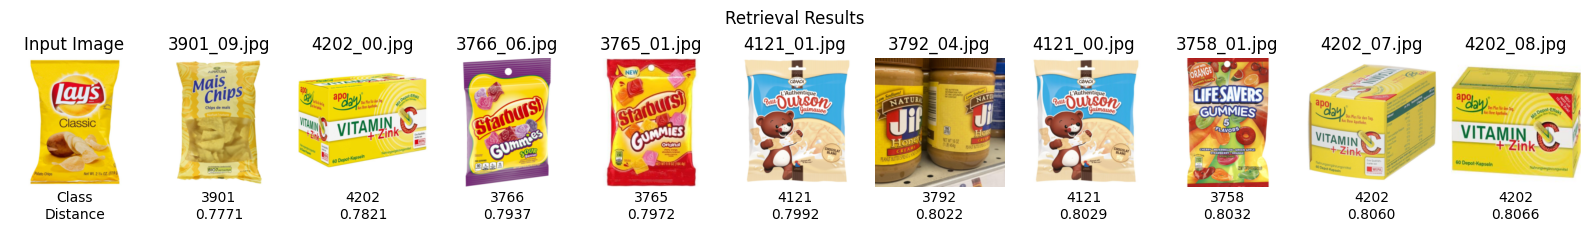

In [76]:
retrieval('/home/yoo/works/CGD/data/test_images/chip.jpg')

## Capture + Retrieval

In [48]:
# 작업 경로 설정
%cd /home/yoo/works/CGD

import os
import time
import pandas as pd
import PIL.Image
from tkinter import *

from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib.request

import requests
from io import BytesIO

import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import torch
from torchvision import transforms

from model import Model

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# tkinter 창 생성
root = Tk()
root.title("Image Capture and Retrieval v1.0")
# root.geometry("1000x500+300+200")
root.resizable(False, False)

# 웹 드라이버 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument("--headless=new")
options.add_argument("--window-size=1920x1080")
options.add_argument("disable-gpu")

# 웹 드라이버 user agent 설정
user_agent= "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Whale/3.19.166.16 Safari/537.36"
options.add_argument('user-agent=' + user_agent)

# 웹 드라이버 실행
driver = webdriver.Chrome(options=options)
driver.get("https://google.com")

# csv 파일 경로
CSV_PATH = 'results/capture/database.csv'

# csv 파일 읽기
if os.path.exists(CSV_PATH):
    initial_df = pd.read_csv(CSV_PATH, index_col=0)
    print(f"Database file is loaded.: {CSV_PATH}")
else:
    initial_df = pd.DataFrame(columns=['alt', 'src', 'height', 'weight', 'scrape_url', 'write_time'])
    initial_df.to_csv(CSV_PATH, index=True)
    print(f"New Database file is created.: {CSV_PATH}")

# 저장된 데이터베이스 경로
# data_base_name = 'results/01 recall scratch/custom_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_data_base.pth'
# data_base_name = 'results/01 recall scratch/danawa_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_data_base.pth'
data_base_name = '/home/yoo/works/CGD/results/danawa/danawa_uncropped_resnext50_MSG_1536_0.1_0.5_0.1_32_data_base.pth'

# 입력 이미지에 적용할 모델 경로
# pretrained_model_path = 'results/01 recall scratch/danawa_uncropped_resnet50_SG_1536_0.1_0.5_0.1_32_model.pth'
pretrained_model_path = '/home/yoo/works/CGD/results/danawa/danawa_uncropped_resnext50_MSG_1536_0.1_0.5_0.1_32_model.pth'

# 출력할 검색 이미지(입력 이미지와 유사한 이미지) 갯수
retrieval_num = 10

backbone_type = 'resnext50'
gd_config = 'MSG'
feature_dim = 1536

# 저장된 데이터베이스 불러오기
data_base = torch.load('{}'.format(data_base_name))

# 입력 이미지 처리
normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), normalize])

# 검색 버튼 클릭 시 실행될 함수
def search():
    # 입력 상자에서 url 가져오기
    url = url_entry.get()

    # selenium으로 url 이동
    driver.get(url)
    print(f"Move To: {url}")

# 캡쳐 버튼 클릭 시 실행될 함수
def capture():

    global data
    
    # 스크롤 내리기 이동 전 위치 저장
    scroll_height = 0
    scroll_total = driver.execute_script("return document.body.scrollHeight")

    while scroll_height < scroll_total:
        webdriver.ActionChains(driver)\
        .scroll_by_amount(0, 1000).pause(1)\
        .perform()
        scroll_height += 1000

    # 셀레니움으로 현재 페이지에 존재하는 이미지 태그 검색
    images = driver.find_elements(By.TAG_NAME, 'img')

    # 이미지 태그로부터 이미지의 메타 정보 수집
    data = {'alt':[], 'src':[], 'height':[], 'weight':[]}
    for index, image in enumerate(images):
        height = int(image.get_attribute("height"))
        weight = int(image.get_attribute("width"))
        
        # 가로 또는 세로 길이가 100 픽셀 이상인 경우만 저장
        if height >= 100 or weight >= 100:

            alt = image.get_attribute("alt")
            if isinstance(alt, str): # 불필요한 글자를 삭제하거나 변경하는 부분
                alt = alt.replace('<br>', '')
            data['alt'].append(alt)

            src = image.get_attribute("src")
            # if isinstance(src, str): # 해상도 변경이 가능한 경우 처리하는 부분
                # src = src.replace('?type=f140', '')
            data['src'].append(src)

            data['height'].append(height)
            data['weight'].append(weight)

            # 데이터 수집 출처와 현재 시간 저장
            data['scrape_url'] = url_entry.get()
            data['write_time'] = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))

            # 데이터베이스에 신규 데이터 추가
            add_df = pd.DataFrame(data)
            sum_df = pd.concat([initial_df, add_df], ignore_index=True)
            sum_df.drop_duplicates(['src'], keep='first', ignore_index=True, inplace=True) # src 기준으로 중복 제거

    # 저장한 이미지의 갯수를 표시하고 첫번째 그림을 캔버스에 표시
    image_count = len(data['src'])
    num_total_label["text"] = image_count
    if image_count > 0:
        print(f"{image_count} images are searched.")
        num_now_label["text"] = 1
        show_image(data['src'][0])
    else:
        print(f"This webpage have no images.")
        num_now_label["text"] = 0
        num_total_label["text"] = 0

    # 데이터베이스 파일을 업데이트
    sum_df.to_csv(CSV_PATH, index=True)
    print("Database file is updated.")
    
def clear():
   url_entry.delete(0, END)
   print("INPUT LABEL is cleared.")

def closing():
    driver.close()
    root.quit()
    root.destroy()
    
def decrease_number():
    current_number = int(num_now_label["text"])
    new_number = current_number - 1
    if new_number == 0 : new_number = int(num_total_label["text"])
    num_now_label["text"] = str(new_number)
    # print(data['src'][new_number-1])
    show_image(data['src'][new_number-1])
    
def increase_number():
    current_number = int(num_now_label["text"])
    new_number = current_number + 1
    if new_number > int(num_total_label["text"]): new_number = 1
    num_now_label["text"] = str(new_number)
    # print(data['src'][new_number-1])
    show_image(data['src'][new_number-1])
    
def show_image(url):
    # print(url)

    # 이미지를 저장하는 경우 사용하는 코드
    # image_path = "results/capture/test.jpg"  # 이미지를 저장할 경로 및 파일 이름
    # urllib.request.urlretrieve(url, image_path)  # 이미지 다운로드
    # query_image = PIL.Image.open(image_path).convert('RGB')
    
    # 이미지를 저장하지 않고 사용하는 코드
    response = requests.get(url)
    query_image = PIL.Image.open(BytesIO(response.content)).convert('RGB')
    
    input = transform(query_image)
    input = input.unsqueeze(0)

    # 입력 이미지에 모델 적용
    model = Model(backbone_type, gd_config, feature_dim, num_classes=162).cuda()
    model.load_state_dict(torch.load(pretrained_model_path), strict=False)
    model.eval()
    input = input.cuda()
    query_feature, classes = model(input)

    dist_matrix = torch.cdist(query_feature.unsqueeze(0).unsqueeze(0), data_base['test_features'].unsqueeze(0)).squeeze()
    idx = dist_matrix.topk(k=retrieval_num, dim=-1, largest=False)[1]

    # 이미지 출력 관련 코드
    fig, axs = plt.subplots(nrows=1, ncols=retrieval_num+1, figsize=(16, 2.1))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axs[0].imshow(query_image.resize((224, 224), resample=PIL.Image.BILINEAR))
    axs[0].set_title(f'Input Image')
    axs[0].text(112, 230, 'Class', verticalalignment='top' , horizontalalignment='center')
    axs[0].text(112, 260, 'Distance', verticalalignment='top' , horizontalalignment='center')
    axs[0].axis('off')

    for num, index in enumerate(idx):
        retrieval_image = PIL.Image.open(data_base['test_images'][index.item()]).convert('RGB') \
            .resize((224, 224), resample=PIL.Image.BILINEAR)
        retrieval_dist = dist_matrix[index.item()].item()
        
        # 이미지 출력 관련 코드
        axs[num + 1].imshow(retrieval_image)
        axs[num + 1].set_title(f"{os.path.basename(data_base['test_images'][index.item()])}")
        axs[num + 1].text(112, 230, f"{os.path.basename(data_base['test_images'][index.item()]).split('_')[0]}", verticalalignment='top', horizontalalignment='center')
        axs[num + 1].text(112, 260, '%.4f' % retrieval_dist, verticalalignment='top', horizontalalignment='center')
        axs[num + 1].axis('off')

    # 그래프를 출력합니다.
    # plt.suptitle('Retrieval Results')
    plt.tight_layout()
    # plt.savefig('test.png')
    # plt.show()
    canvas = FigureCanvasTkAgg(fig, master=frame3)  # A tk.DrawingArea.
    canvas.draw()
    canvas.get_tk_widget().grid(row=0, column=0)

    # plt.cla()   # clear the current axes
    # plt.clf()   # clear the current figure
    plt.close() # closes the current figure

frame1 = Frame(root)
frame2 = Frame(root)
frame3 = LabelFrame(root, text="Retreival Result", labelanchor='n', bg="white")

# tkinter 위젯 생성
url_label = Label(frame1, text="URL:", width=10)
url_entry = Entry(frame1, width=50)
url_entry.insert(0, "https://google.com")
search_button = Button(frame1, text="Search", command=search, width=10)
clear_button = Button(frame1, text="Reset", command=clear, width=10)
capture_button = Button(frame1, text="Capture", command=capture, width=10)
quit_button = Button(frame1, text="Quit", command=closing, width=10)

# 숫자를 보여주는 Label 위젯
num_now_label = Label(frame2, text="0", width=5)
slash_label = Label(frame2, text="/")
num_total_label = Label(frame2, text="0", width=5)

# 왼쪽 화살표 버튼
left_button = Button(frame2, text="<<", command=decrease_number)

# 오른쪽 화살표 버튼
right_button = Button(frame2, text=">>", command=increase_number)

# tkinter 위젯 배치
frame1.pack(side='top')
frame2.pack(side='top')
frame3.pack(side='top')

url_label.pack(side='left')
url_entry.pack(side='left')
search_button.pack(side='left')
clear_button.pack(side='left')
capture_button.pack(side='left')
quit_button.pack(side='left')

left_button.pack(side='left')
num_now_label.pack(side='left')
slash_label.pack(side='left')
num_total_label.pack(side='left')
right_button.pack(side='left')

# tkinter 실행
root.mainloop()

/home/yoo/works/CGD
Database file is loaded.: results/capture/database.csv
INPUT LABEL is cleared.
Move To: https://search.shopping.naver.com/search/category/100007933?
12 images are searched.
Database file is updated.
